# 1.Setup and Load Data

## 1.2 install dependencies and setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/0p/jqszb2fj04qb8cpxp521c9mh0000gn/T/pip-install-2sx3a10v/tensorflow-gpu_e07c93ea568f4c9791506150f194363c/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subp

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcr

In [3]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

2023-04-03 14:30:52.879540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_dir = os.path.join(os.pardir, os.pardir, "Data", "AAUT2IA", "train")
test_dir = os.path.join(os.pardir, os.pardir, "Data", "AAUT2IA", "test")

## 1.2 remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
def check_images(train_dir):
    for image_class in os.listdir(os.path.join(train_dir)):
        if os.path.isdir(os.path.join(train_dir, image_class)):
            #print(image_class)
            for image in os.listdir(os.path.join(train_dir, image_class)):
                image_path = os.path.join(train_dir, image_class, image)
                if os.path.isdir(image_path):
                    continue
                else:
                    try:
                        img = cv2.imread(image_path)
                        tip = imghdr.what(image_path)
                        if tip not in image_extensions:
                            print(f"Image not in extensions list {image_path}")
                            os.remove(image_path)
                    except Exception as e:
                            print(f"Issue with image {image_path}")

In [8]:
check_images(train_dir)

(48, 48, 3)

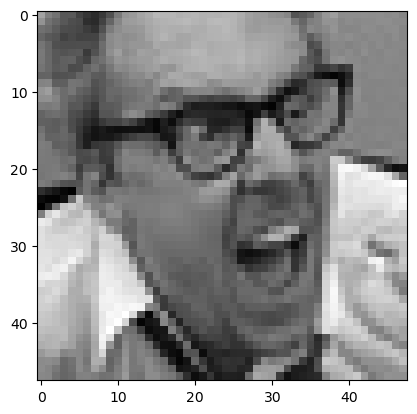

In [9]:
img = cv2.imread(os.path.join(train_dir, "angry", "Training_3908.jpg"))
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
img.shape

## 1.3 load data

In [10]:
import numpy as np

In [82]:
#data pipeline (pixel_matrix, class_n)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, color_mode='grayscale', seed=123)
test_data =  tf.keras.utils.image_dataset_from_directory(test_dir, color_mode='grayscale', seed=123)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [83]:
train_data_scaled_iterator = train_data.as_numpy_iterator()
test_data_scaled_iterator = test_data.as_numpy_iterator()

In [84]:
print(train_data.class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [14]:
train_batch = train_data_scaled_iterator.next()
class_names = train_data.class_names
class_names
#train_data_scaled_iterator.next()

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

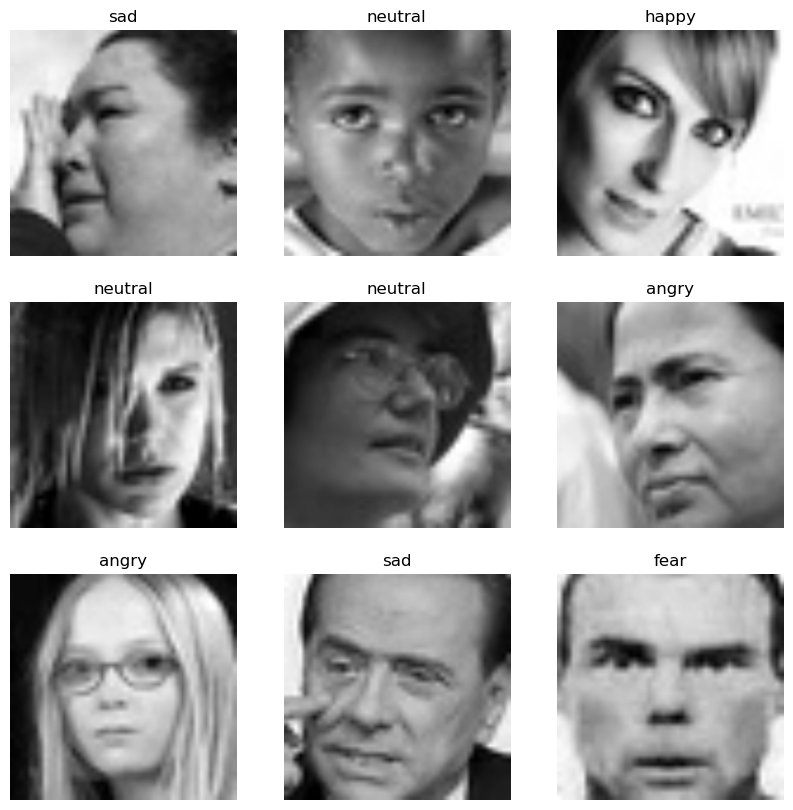

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

NameError: name 'train_data' is not defined

# 2.Preprocess Data

## 2.1 scale data

In [5]:
#Normalize Data
#Gray channel values in between 0 and 255
train_data_scaled = train_data.map(lambda x, y: (x / 255,y))
test_data_scaled = test_data.map(lambda x, y: (x / 255,y))
len(train_data_scaled)

NameError: name 'train_data' is not defined

In [6]:
train_batch1 = train_data_scaled.as_numpy_iterator().next()
train_batch1[0].shape

NameError: name 'train_data_scaled' is not defined

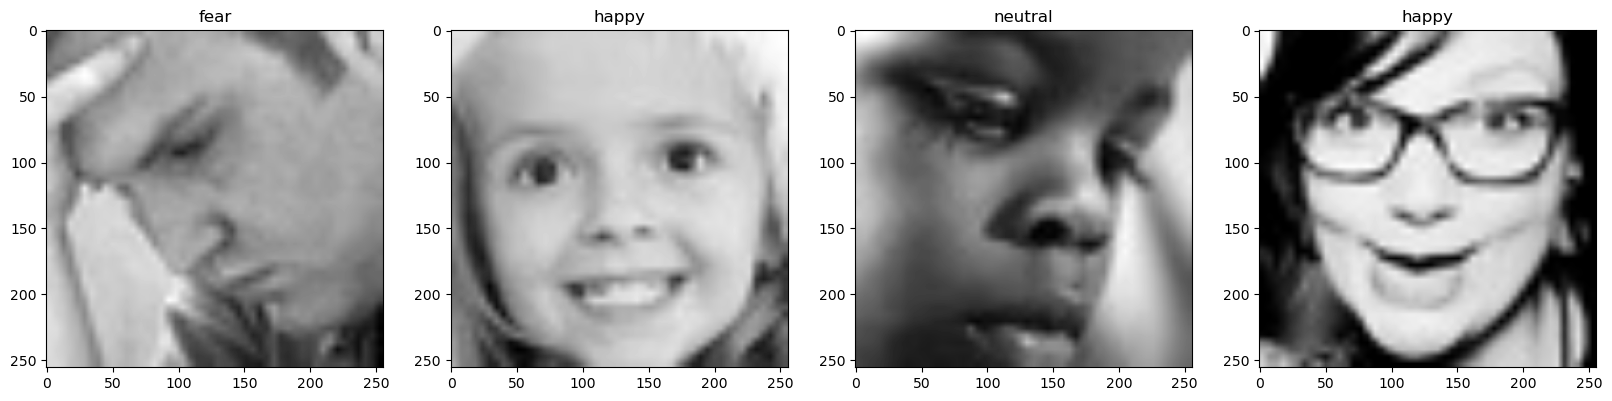

In [88]:
fig1, ax1 = plt.subplots(ncols=4, figsize= (20, 20))
for idx, img in enumerate(train_batch1[0][:4]):
    ax1[idx].imshow(img, cmap="gray")
    #ax[idx].title.set_text(train_batch1[1][idx])
    ax1[idx].title.set_text(class_names[train_batch1[1][idx]])

## 2.2 split data

In [3]:
train_size = int(len(train_data_scaled)*.875) #+-70% data 786
val_size = int(len(test_data_scaled)) #+-20% data
test_size = int(len(train_data_scaled)*.125) #+-10% data

NameError: name 'train_data_scaled' is not defined

In [ ]:
train = train_data_scaled.take(train_size)
val = test_data_scaled.take(val_size)
test = train_data_scaled.skip(train_size).take(test_size)

# 3.Deep Model

## 3.1 Building Deep Learning Model

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

2023-04-15 17:06:51.585294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [92]:
len_cl_names = len(class_names) #7
#MaxPooling reduces image size by getting the max value of the pixels in the filter
model = keras.Sequential(
    [ 
        layers.Conv2D(16, (3,3), activation='relu', name="layer1", padding="same", input_shape=(256, 256, 1)),
        layers.MaxPooling2D(name="layer2"),
        layers.Conv2D(32, (3,3), activation="relu", padding="same", name="layer3"),
        layers.MaxPooling2D(name="layer4"),
        layers.Conv2D(16, (3,3), activation='relu', padding="same", name="layer5"),
        layers.MaxPooling2D(name="layer6"),
        layers.Flatten(name="layer7"), #32 * 32 * 16 = 16384
        layers.Dense(256, activation="relu", name="layer8"),
        layers.Dense(7, activation="softmax", name="layer9"),
    ]
)
print(len_cl_names)

7


In [93]:
model.output_shape

(None, 7)

In [98]:
model.compile("adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 layer2 (MaxPooling2D)       (None, 128, 128, 16)      0         
                                                                 
 layer3 (Conv2D)             (None, 128, 128, 32)      4640      
                                                                 
 layer4 (MaxPooling2D)       (None, 64, 64, 32)        0         
                                                                 
 layer5 (Conv2D)             (None, 64, 64, 16)        4624      
                                                                 
 layer6 (MaxPooling2D)       (None, 32, 32, 16)        0         
                                                                 
 layer7 (Flatten)            (None, 16384)           

## 3.2 Train

In [99]:
logdir = 'logs'

In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist = model.fit(train, epochs=20, validation_data=test, callbacks=[tensorboard_callback])

Epoch 1/20
785/785 [==============================] - 467s 594ms/step - loss: 1.6827 - accuracy: 0.3287 - val_loss: 1.5703 - val_accuracy: 0.3825
Epoch 2/20
785/785 [==============================] - 428s 545ms/step - loss: 1.4516 - accuracy: 0.4399 - val_loss: 1.4408 - val_accuracy: 0.4434
Epoch 3/20
785/785 [==============================] - 413s 526ms/step - loss: 1.2725 - accuracy: 0.5151 - val_loss: 1.4428 - val_accuracy: 0.4581
Epoch 4/20
785/785 [==============================] - 403s 513ms/step - loss: 1.0348 - accuracy: 0.6124 - val_loss: 1.5270 - val_accuracy: 0.4749
Epoch 5/20
785/785 [==============================] - 461s 587ms/step - loss: 0.7203 - accuracy: 0.7386 - val_loss: 1.8179 - val_accuracy: 0.4648
Epoch 6/20
785/785 [==============================] - 401s 510ms/step - loss: 0.4360 - accuracy: 0.8473 - val_loss: 2.2927 - val_accuracy: 0.4615
Epoch 7/20
785/785 [==============================] - 402s 512ms/step - loss: 0.2569 - accuracy: 0.9139 - val_loss: 2.6701 -

## 3.3 Results

20


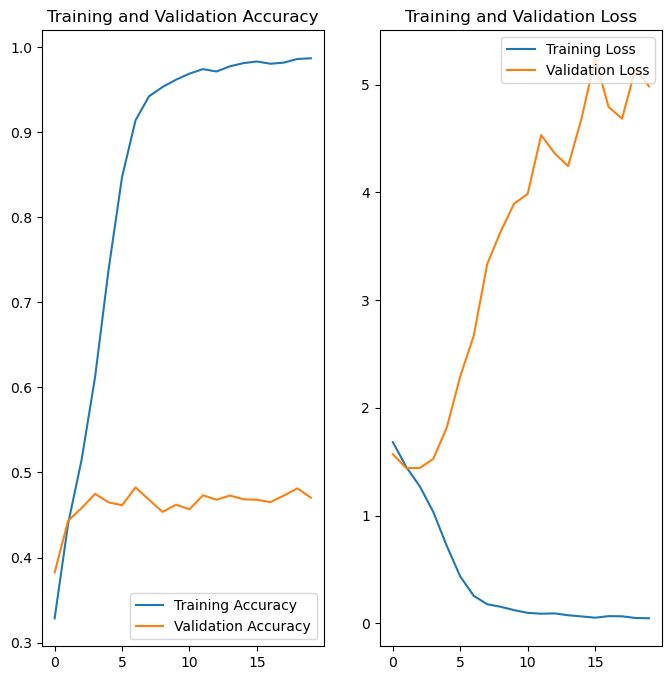

In [116]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
print(len(val_loss))

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 3.4 Data Augmentation

In [120]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

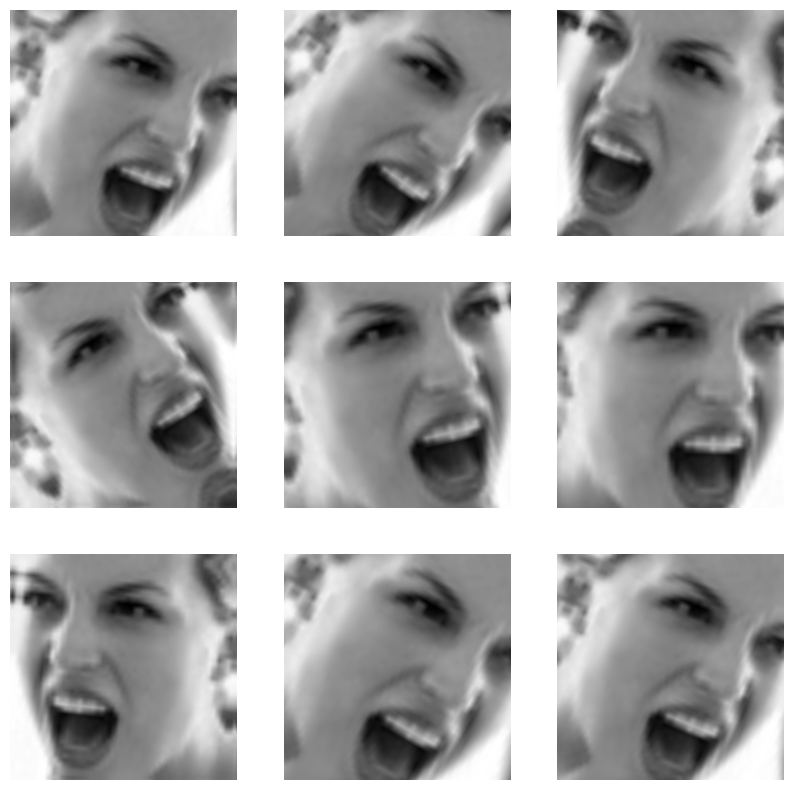

In [122]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"), cmap='gray')
    plt.axis("off")

In [125]:
model2 = keras.Sequential(
    [ 
        layers.Conv2D(16, (3,3), activation='relu', name="layer1", padding="same", input_shape=(256, 256, 1)),
        layers.MaxPooling2D(name="layer2"),
        layers.Conv2D(32, (3,3), activation="relu", padding="same", name="layer3"),
        layers.MaxPooling2D(name="layer4"),
        layers.Conv2D(16, (3,3), activation='relu', padding="same", name="layer5"),
        layers.MaxPooling2D(name="layer6"),
        layers.Dropout(0.2),
        layers.Flatten(name="layer7"), #32 * 32 * 16 = 16384
        layers.Dense(256, activation="relu", name="layer8"),
        layers.Dense(7, name="layer9"),
    ]
)


In [126]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [128]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 layer2 (MaxPooling2D)       (None, 128, 128, 16)      0         
                                                                 
 layer3 (Conv2D)             (None, 128, 128, 32)      4640      
                                                                 
 layer4 (MaxPooling2D)       (None, 64, 64, 32)        0         
                                                                 
 layer5 (Conv2D)             (None, 64, 64, 16)        4624      
                                                                 
 layer6 (MaxPooling2D)       (None, 32, 32, 16)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 16)      

In [134]:
epochs = 20
history = model.fit(
  train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/20
785/785 [==============================] - 428s 545ms/step - loss: 1.8116 - accuracy: 0.2529 - val_loss: 2.0761 - val_accuracy: 0.2471
Epoch 2/20
785/785 [==============================] - 426s 543ms/step - loss: 1.8091 - accuracy: 0.2526 - val_loss: 2.0761 - val_accuracy: 0.2471
Epoch 3/20
785/785 [==============================] - 428s 545ms/step - loss: 1.8087 - accuracy: 0.2530 - val_loss: 2.0761 - val_accuracy: 0.2471
Epoch 4/20
785/785 [==============================] - 428s 546ms/step - loss: 1.8089 - accuracy: 0.2531 - val_loss: 2.0762 - val_accuracy: 0.2471
Epoch 5/20
785/785 [==============================] - 432s 550ms/step - loss: 1.8089 - accuracy: 0.2529 - val_loss: 2.0761 - val_accuracy: 0.2471
Epoch 6/20
785/785 [==============================] - 422s 538ms/step - loss: 1.8086 - accuracy: 0.2531 - val_loss: 2.0762 - val_accuracy: 0.2471
Epoch 7/20
785/785 [==============================] - 425s 542ms/step - loss: 1.8084 - accuracy: 0.2531 - val_loss: 2.0762 -

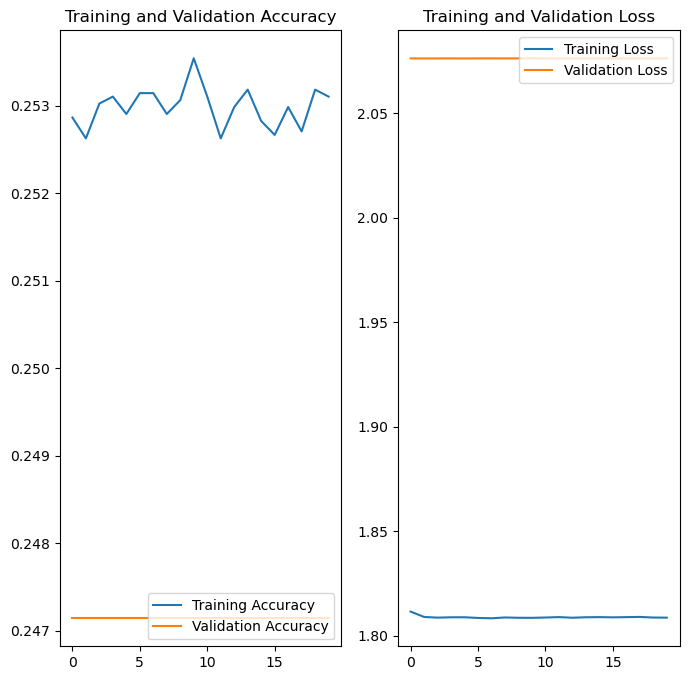

In [135]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [147]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import unit_norm
model3 = keras.Sequential(
    [ 
        layers.Conv2D(16, (3,3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(l=0.01), kernel_constraint=unit_norm(), kernel_initializer='he_normal', input_shape=(256, 256, 1)),
        layers.MaxPooling2D(),
        layers.Dropout(0.4),
        layers.Conv2D(32, (3,3), activation="relu", padding="same", kernel_regularizer=regularizers.l2(l=0.01)),
        layers.MaxPooling2D(),
        layers.Dropout(0.4),
        layers.Flatten(), #32 * 32 * 16 = 16384
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(7),
    ]
)


In [148]:
model3.compile("adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)      

In [149]:
history = model3.fit(
  train,
  validation_data=test,
  epochs=20
)

Epoch 1/20
785/785 [==============================] - 683s 869ms/step - loss: 3.1154 - accuracy: 0.2408 - val_loss: 2.4522 - val_accuracy: 0.2076
Epoch 2/20
785/785 [==============================] - 710s 905ms/step - loss: 2.3504 - accuracy: 0.2602 - val_loss: 2.4024 - val_accuracy: 0.2042
Epoch 3/20
785/785 [==============================] - 669s 852ms/step - loss: 2.2906 - accuracy: 0.2767 - val_loss: 2.3246 - val_accuracy: 0.2090
Epoch 4/20
785/785 [==============================] - 639s 814ms/step - loss: 2.2425 - accuracy: 0.2968 - val_loss: 2.2642 - val_accuracy: 0.2810
Epoch 5/20
785/785 [==============================] - 636s 810ms/step - loss: 2.2149 - accuracy: 0.3055 - val_loss: 2.2136 - val_accuracy: 0.3147
Epoch 6/20
785/785 [==============================] - 641s 817ms/step - loss: 2.1954 - accuracy: 0.3065 - val_loss: 2.1982 - val_accuracy: 0.3242
Epoch 7/20
785/785 [==============================] - 639s 814ms/step - loss: 2.1801 - accuracy: 0.3128 - val_loss: 2.1618 -

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Add a pooling layer
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add another fully connected layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()





Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)    

In [1]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (4, 4), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

NameError: name 'Sequential' is not defined